# 🏦LOAN APPLICATION APPROVAL PREDICTION

## (1) Load Dataset & Basic Info.....

In [1]:
import pandas as pd
import numpy as np
DATA_PATH = "loan_applications.csv"
df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
df.head()

Shape: (50000, 20)


,application_id,customer_id,application_date,loan_type,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,cibil_score,existing_emis_monthly,debt_to_income_ratio,property_ownership_status,residential_address,applicant_age,gender,number_of_dependents,loan_status,Unnamed: 19
0,c8bf0bea-70e6-4870-9125-41b8210c527f,CUST109427,09-04-2023,Business Loan,604000,12,11.66,Medical Emergency,Retired,34700,714,1100,3.17,Rented,"94/31, Sehgal Zila, Vadodara-380521, Anantapur...",28,Female,3,Approved,NaN
1,91224cec-3544-4bc7-ac15-a9792da54c02,CUST106146,23-09-2023,Car Loan,100000,240,13.62,Education,Unemployed,51600,667,0,0.00,Owned,"H.No. 00, Sheth Chowk, Ichalkaranji 006728, Im...",44,Other,3,Approved,NaN
2,4efcd02d-4a03-4ab7-9bd1-0ff430493d0c,CUST100674,22-05-2023,Education Loan,431000,60,11.40,Medical Emergency,Self-Employed,14800,808,4600,31.08,Rented,"H.No. 81, Dutta Path, Kozhikode-340301, Tadepa...",56,Other,4,Approved,NaN
3,a61337d4-ba04-4a68-b492-2cb8266e6ed7,CUST106466,09-07-2024,Car Loan,324000,120,10.36,Debt Consolidation,Self-Employed,28800,647,4000,13.89,Rented,"H.No. 022, Rege Road, Tiruvottiyur-927857, Aur...",27,Other,4,Declined,NaN
4,a8d1639e-170b-41b2-826a-55c7dae38d16,CUST112319,20-11-2023,Personal Loan,100000,36,14.14,Business Expansion,Salaried,43900,624,1100,2.51,Rented,"85/24, Bali Zila, Sambalpur 922071, Tumkur, Ke...",50,Other,0,Declined,NaN


In [2]:
info = df.dtypes.rename("dtype").to_frame()
info

,dtype
application_id,object
customer_id,object
application_date,object
loan_type,object
loan_amount_requested,int64
loan_tenure_months,int64
interest_rate_offered,float64
purpose_of_loan,object
employment_status,object
monthly_income,int64


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   application_id             50000 non-null  object 
 1   customer_id                50000 non-null  object 
 2   application_date           50000 non-null  object 
 3   loan_type                  50000 non-null  object 
 4   loan_amount_requested      50000 non-null  int64  
 5   loan_tenure_months         50000 non-null  int64  
 6   interest_rate_offered      50000 non-null  float64
 7   purpose_of_loan            50000 non-null  object 
 8   employment_status          50000 non-null  object 
 9   monthly_income             50000 non-null  int64  
 10  cibil_score                50000 non-null  int64  
 11  existing_emis_monthly      50000 non-null  int64  
 12  debt_to_income_ratio       50000 non-null  float64
 13  property_ownership_status  50000 non-null  obj

In [4]:
df.describe()

,loan_amount_requested,loan_tenure_months,interest_rate_offered,monthly_income,cibil_score,existing_emis_monthly,debt_to_income_ratio,applicant_age,number_of_dependents
count,5.000000e+04,50000.0000,50000.000000,50000.000000,50000.000000,50000.0000,50000.000000,50000.000000,50000.000000
mean,5.139130e+05,121.3884,10.528547,50844.940000,699.149760,3066.3620,8.573188,43.060880,2.012280
std,2.752126e+05,121.4104,1.926442,23874.742237,49.920325,1896.9745,9.587649,12.970254,1.408761
min,1.000000e+05,12.0000,7.000000,10000.000000,476.000000,0.0000,0.000000,21.000000,0.000000
25%,3.000000e+05,24.0000,9.150000,33600.000000,665.000000,1700.0000,3.090000,32.000000,1.000000
50%,5.030000e+05,60.0000,10.510000,50300.000000,699.000000,3000.0000,5.950000,43.000000,2.000000
75%,7.010000e+05,240.0000,11.850000,67300.000000,733.000000,4400.0000,10.292500,54.000000,3.000000
max,1.618000e+06,360.0000,19.620000,162000.000000,888.000000,11400.0000,102.000000,65.000000,4.000000


In [5]:
print(df["loan_status"].value_counts())
print(df["loan_status"].value_counts(normalize=True))

loan_status
Approved                   40882
Declined                    8092
Fraudulent - Detected        542
Fraudulent - Undetected      484
Name: count, dtype: int64
loan_status
Approved                   0.81764
Declined                   0.16184
Fraudulent - Detected      0.01084
Fraudulent - Undetected    0.00968
Name: proportion, dtype: float64


In [6]:
df.dtypes

application_id                object
customer_id                   object
application_date              object
loan_type                     object
loan_amount_requested          int64
loan_tenure_months             int64
interest_rate_offered        float64
purpose_of_loan               object
employment_status             object
monthly_income                 int64
cibil_score                    int64
existing_emis_monthly          int64
debt_to_income_ratio         float64
property_ownership_status     object
residential_address           object
applicant_age                  int64
gender                        object
number_of_dependents           int64
loan_status                   object
Unnamed: 19                   object
dtype: object

## (2)Categorical Counts & Missing‑Value Profile....

In [7]:
# Missing values
missing = df.isnull().sum()
display(missing[missing > 0])

# Categorical value counts
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts()[:10])


Unnamed: 19    48974
dtype: int64


application_id value counts:
application_id
c8bf0bea-70e6-4870-9125-41b8210c527f    1
91224cec-3544-4bc7-ac15-a9792da54c02    1
4efcd02d-4a03-4ab7-9bd1-0ff430493d0c    1
a61337d4-ba04-4a68-b492-2cb8266e6ed7    1
a8d1639e-170b-41b2-826a-55c7dae38d16    1
d91cf990-efa1-44ad-94bf-44e6c79d1051    1
cd837d7e-98de-4d26-8b6f-f59d7bef9d2a    1
63e87083-c21d-4b53-856b-b58b3285b9aa    1
7eb31cc3-e1e7-4ef9-ae4e-b86771d60119    1
74126982-ef72-40dd-8cc3-5d441cfe7b02    1
Name: count, dtype: int64

customer_id value counts:
customer_id
CUST110828    10
CUST114139    10
CUST100339    10
CUST118934    10
CUST112928     9
CUST107179     9
CUST114744     9
CUST114396     9
CUST118149     9
CUST119411     9
Name: count, dtype: int64

application_date value counts:
application_date
26-05-2024    70
01-01-2025    68
05-10-2023    67
30-04-2025    65
17-05-2025    65
12-03-2024    64
17-11-2024    64
11-12-2022    63
19-02-2024    62
24-11-2023    62
Name: count, dtype: int64

loan_type value counts:
loan

## (3) Data Visualisation...


### (a)Plot loan status distribution

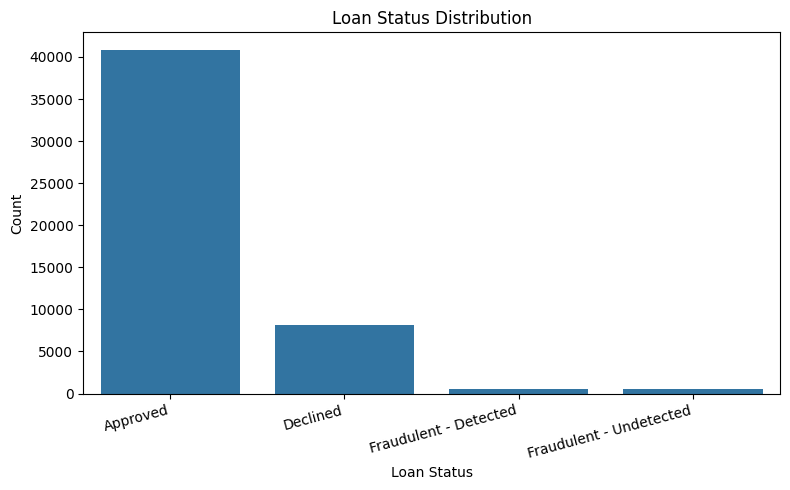

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))  # Adjust figure size as needed
sns.countplot(x="loan_status", data=df)

plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")

# Rotate x-axis labels for clarity
plt.xticks(rotation=15, ha="right")

plt.tight_layout()
plt.show()


### (b)Plotly bar for loan_type vs approval rate

In [9]:
# Plotly bar for loan_type vs approval rate
import plotly.express as px

plot_df = (
    df.groupby("loan_type")["loan_status"]
      .value_counts(normalize=True)
      .mul(100)
      .rename("percentage")
      .reset_index()
)
fig = px.bar(plot_df, x="loan_type", y="percentage",
             color="loan_status", barmode="group",
             title="Approval % by Loan Type")
fig.show()

###  (c)Approval Rate bar graphs

In [10]:
import plotly.express as px
# Categorical and numerical features
cat_cols = ["purpose_of_loan", "employment_status", "property_ownership_status", "gender", "loan_type"]
num_cols = [
    "loan_amount_requested", "loan_tenure_months", "interest_rate_offered",
    "monthly_income", "cibil_score", "existing_emis_monthly",
    "debt_to_income_ratio", "applicant_age", "number_of_dependents"
]
#Categorical: Count + Approval Rate

for col in cat_cols:
    # Get value counts and sort
    count_df = df[col].value_counts().sort_values(ascending=False).reset_index()
    count_df.columns = [col, "count"]

    # Create bar chart with value labels
    fig = px.bar(
        count_df,
        x=col,
        y="count",
        title=f"{col.replace('_', ' ').title()} Distribution",
        text="count",
        color_discrete_sequence=["royalblue"]
    )

    # Style the chart
    fig.update_traces(textposition='outside')
    fig.update_layout(xaxis_title=col.title(), yaxis_title="Count")
    fig.show()


    

### (d)Distribution  and Box Plot of all Numeric values

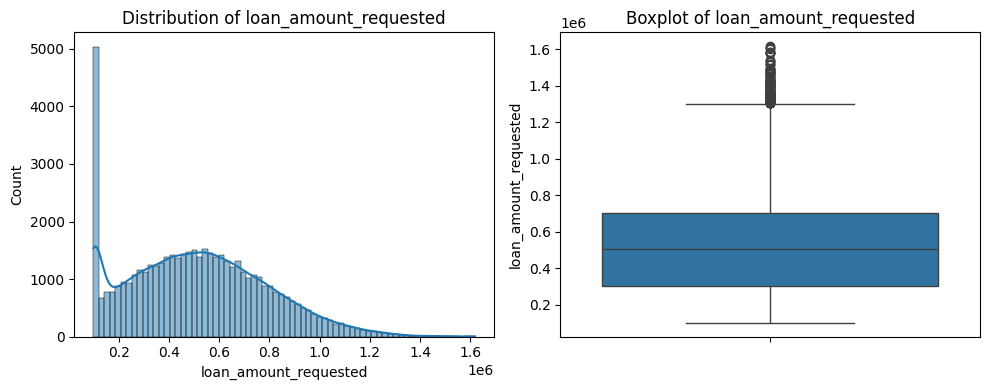

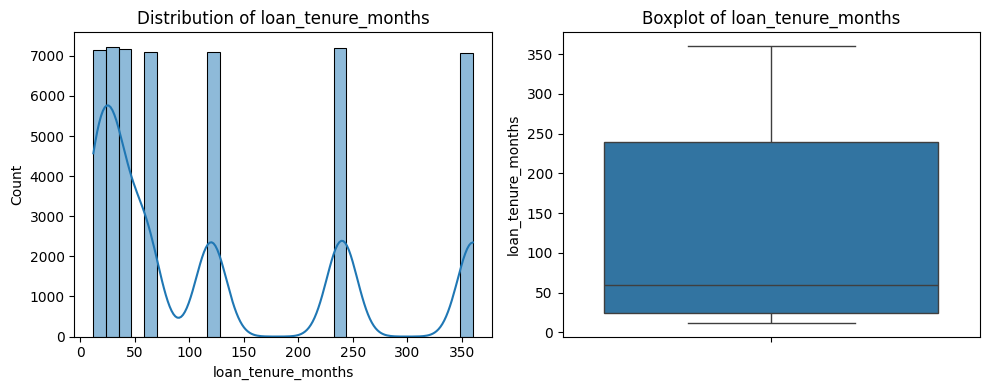

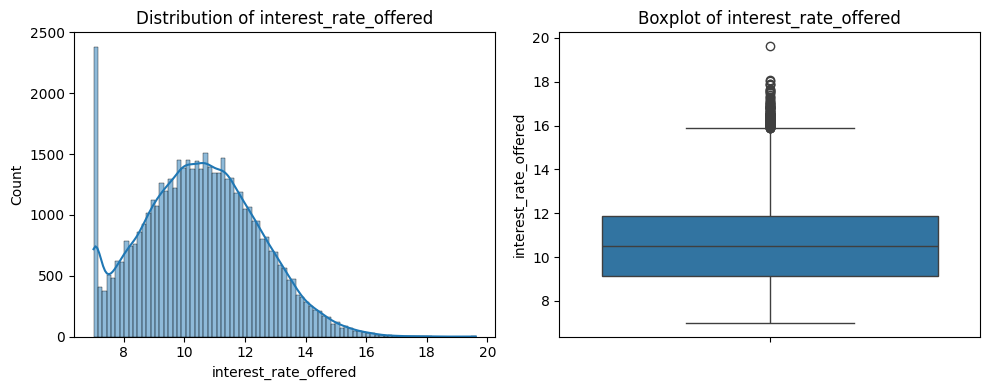

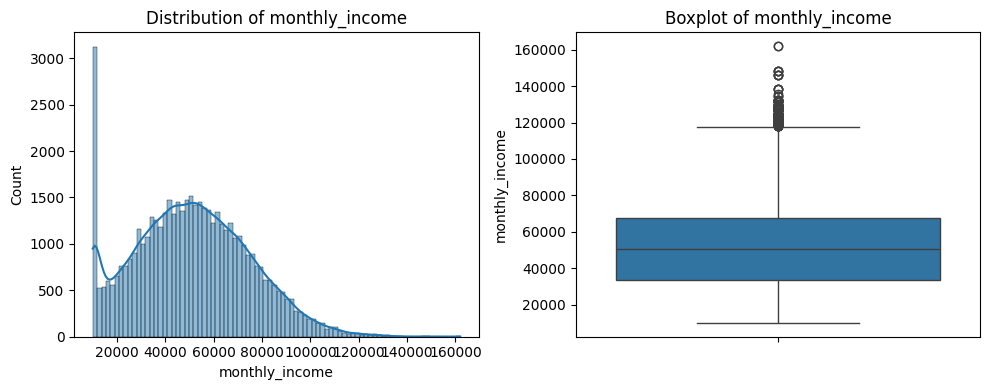

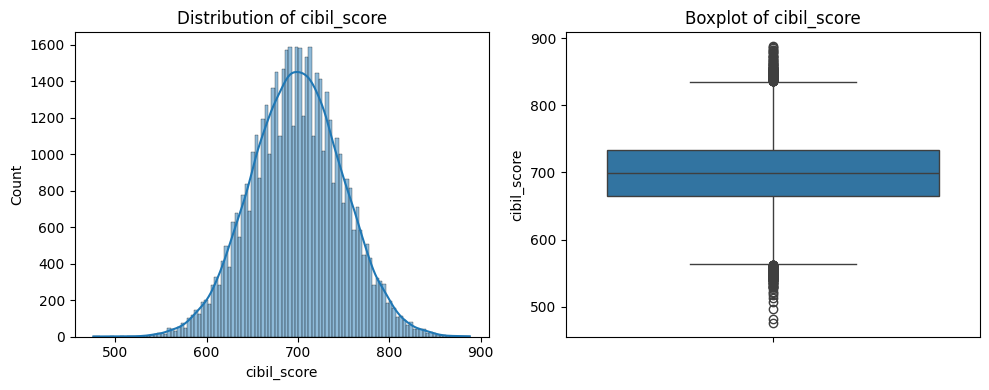

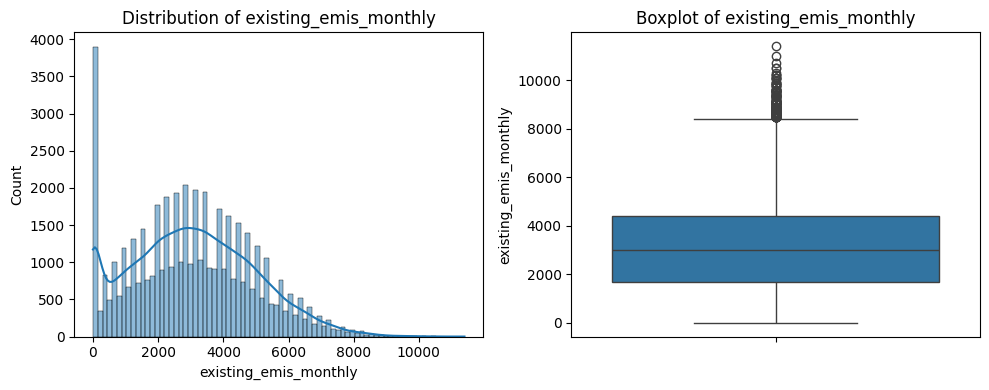

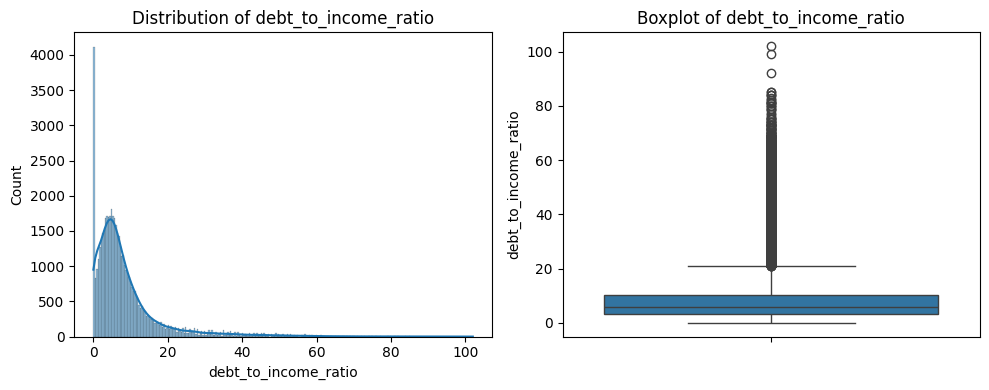

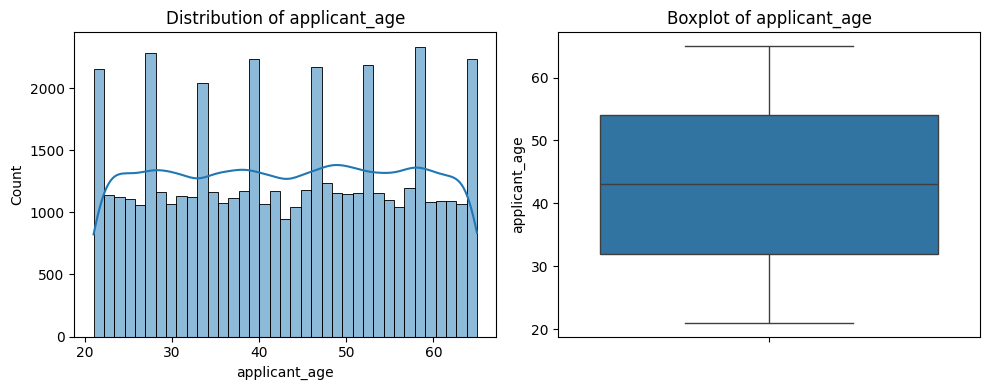

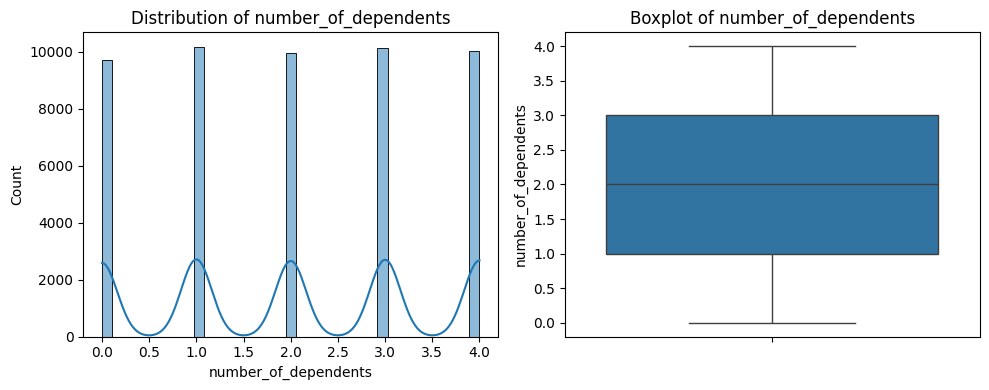

In [11]:
for col in num_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

    plt.subplot(1,2,2)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

### (e) Loan Amount Requested Distribution by Loan Status

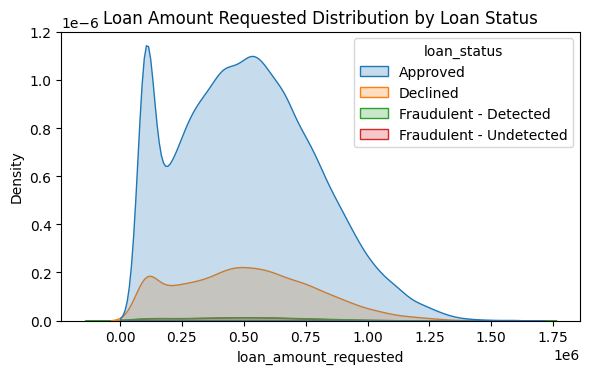

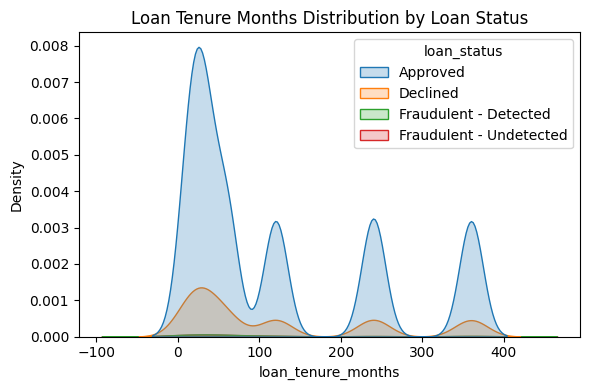

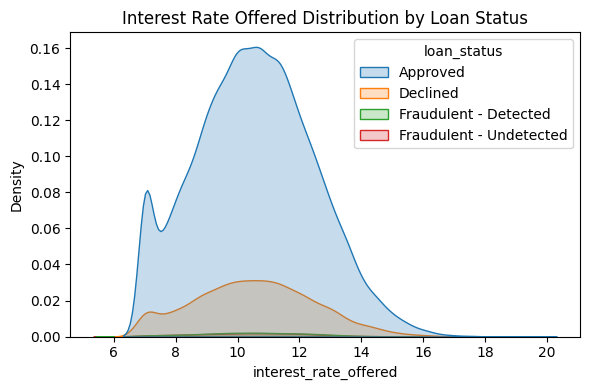

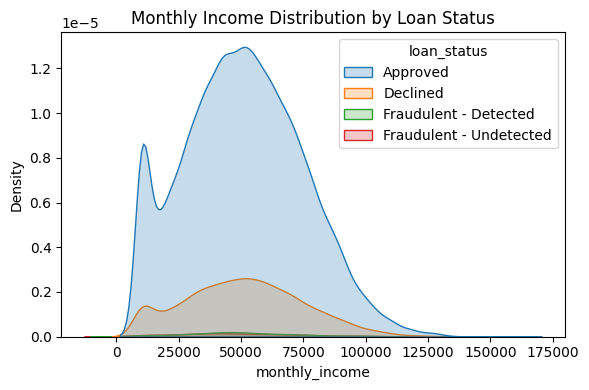

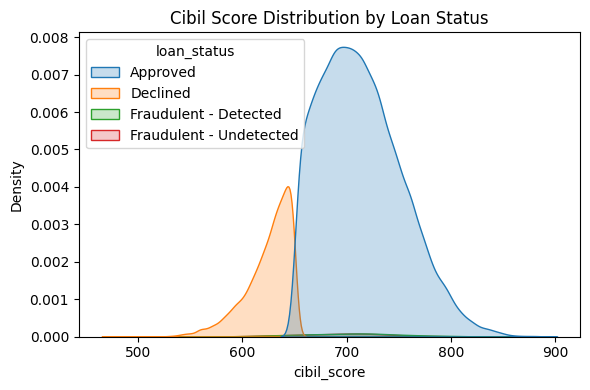

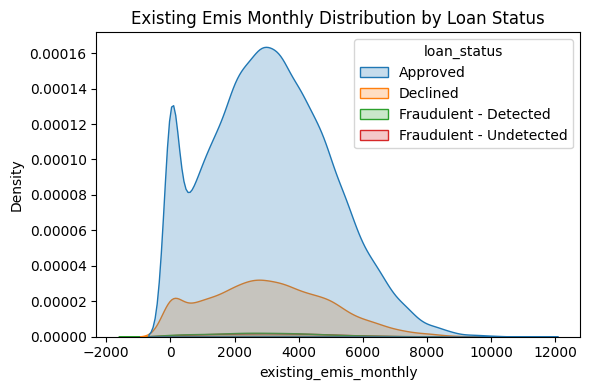

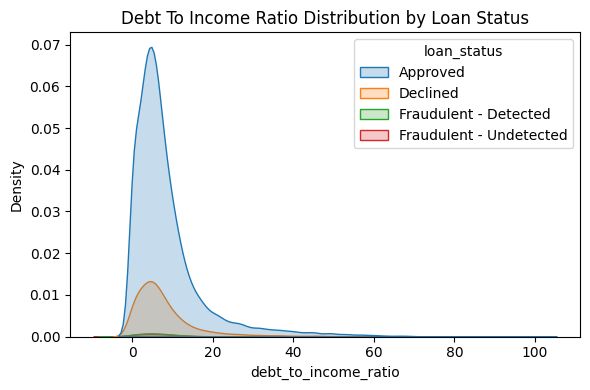

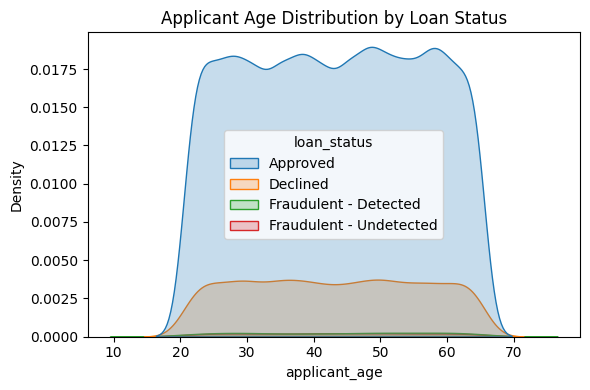

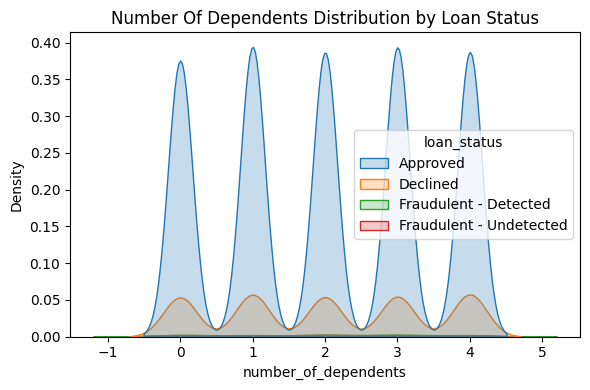

In [12]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, hue="loan_status", fill=True)
    plt.title(f"{col.replace('_', ' ').title()} Distribution by Loan Status")
    plt.tight_layout()
    plt.show()

### (f)Plot correlation heatmap

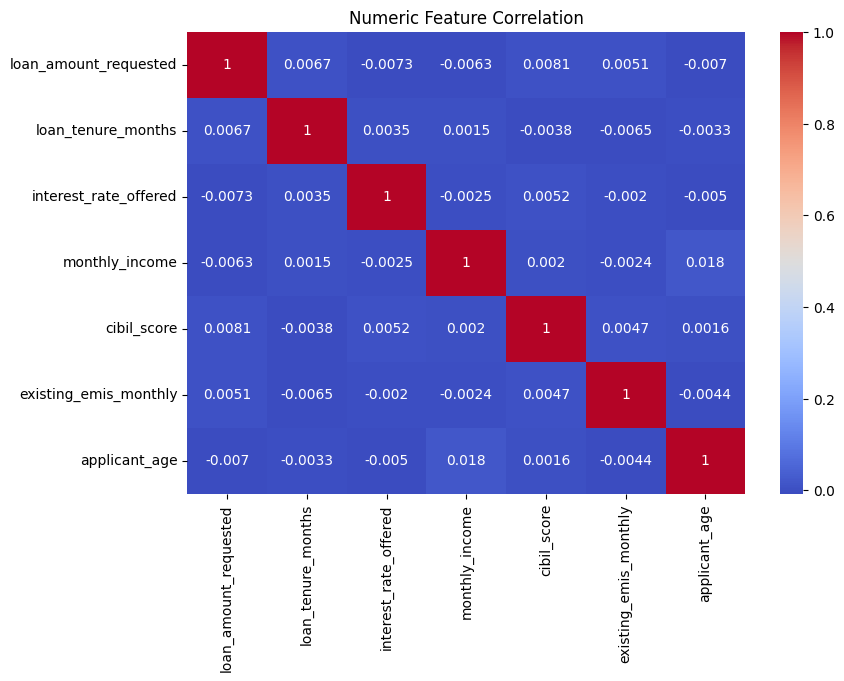

In [13]:
# Plot correlation heatmap
numeric_cols = [
    "loan_amount_requested","loan_tenure_months","interest_rate_offered",
    "monthly_income","cibil_score","existing_emis_monthly","applicant_age"
]

plt.figure(figsize=(9,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Numeric Feature Correlation")
plt.show()


## (4)Data Preprocessing....

### [Feature Selection + Encoding + Scaling]

In [14]:
if "Unnamed: 19" in df.columns:
    df = df.drop(columns=["Unnamed: 19"])
# Convert application_date to datetime (not used as a feature here)
df["application_date"] = pd.to_datetime(df["application_date"], errors="coerce")


TARGET = "loan_status"
APPROVED_LABEL = "Approved"
df["target"] = np.where(df[TARGET] == APPROVED_LABEL, 1, 0)
print(df["target"].value_counts())

#Feature selection
NUM_COLS = [
    "loan_amount_requested", "loan_tenure_months", "interest_rate_offered",
    "monthly_income", "cibil_score", "existing_emis_monthly",
    "debt_to_income_ratio", "applicant_age", "number_of_dependents"
]

CAT_COLS = [
    "purpose_of_loan", "employment_status", "property_ownership_status",
    "gender", "loan_type"
]

# Subset
X_num = df[NUM_COLS]
X_cat = pd.get_dummies(df[CAT_COLS], drop_first=True)  # One‑hot encode
X = pd.concat([X_num, X_cat], axis=1)
y = df["target"]

print("Final feature count:", X.shape[1])

target
1    40882
0     9118
Name: count, dtype: int64
Final feature count: 28


## (5)Model Build & Basic Comparison....


### [Train/Test Split and Baseline Models]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
print("Train size:", X_train.shape, "Test size:", X_test.shape)

scaler = StandardScaler()
X_train[NUM_COLS] = scaler.fit_transform(X_train[NUM_COLS])
X_test[NUM_COLS] = scaler.transform(X_test[NUM_COLS])


Train size: (40000, 28) Test size: (10000, 28)


## (6)Hyper‑Parameter Tuning and Model Evalution...

### (a)Logisitic Regression

In [16]:
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, roc_auc_score)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
logreg = LogisticRegression(max_iter=1000, class_weight="balanced")
logreg.fit(X_train, y_train)

# Predictions & metrics
pred_lr = logreg.predict(X_test)
print("\nLogistic Regression Results")
print("Accuracy:", accuracy_score(y_test, pred_lr))
print(confusion_matrix(y_test, pred_lr))
print(classification_report(y_test, pred_lr))
print("ROC‑AUC:", roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]))



Logistic Regression Results
Accuracy: 0.887
[[1667  157]
 [ 973 7203]]
              precision    recall  f1-score   support

           0       0.63      0.91      0.75      1824
           1       0.98      0.88      0.93      8176

    accuracy                           0.89     10000
   macro avg       0.81      0.90      0.84     10000
weighted avg       0.92      0.89      0.89     10000

ROC‑AUC: 0.9478530310150377


### Visualization of confusion matrix of Logistic Regression

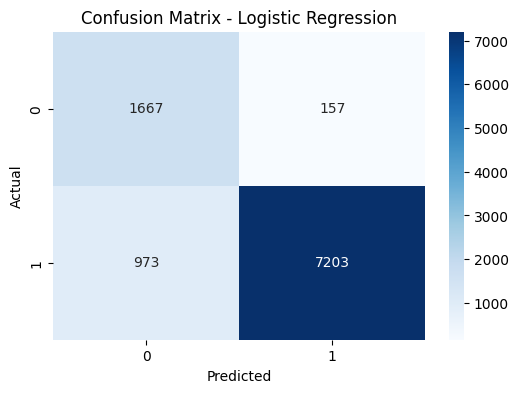

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, pred_lr)
labels = logreg.classes_ if hasattr(logreg, 'classes_') else ["Class 0", "Class 1"]

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### (b)Random Forest

In [18]:
#Random Forest
rf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)
print("\nRandom Forest Results")
print("Accuracy:", accuracy_score(y_test, pred_rf))
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test, pred_rf))
print("ROC‑AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


Random Forest Results
Accuracy: 0.9823
[[1647  177]
 [   0 8176]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1824
           1       0.98      1.00      0.99      8176

    accuracy                           0.98     10000
   macro avg       0.99      0.95      0.97     10000
weighted avg       0.98      0.98      0.98     10000

ROC‑AUC: 0.965752083547911


### Visualization of confusion matrix of Random Forest

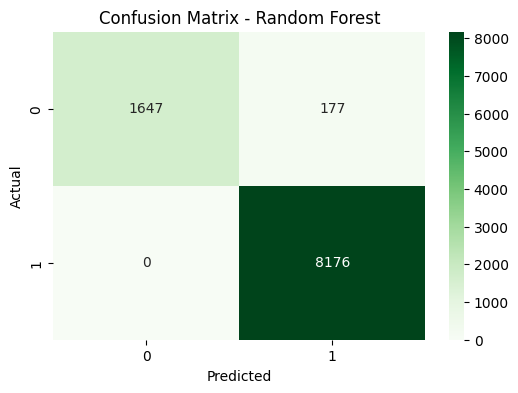

In [19]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, pred_rf)
labels_rf = rf.classes_ if hasattr(rf, 'classes_') else ["Class 0", "Class 1"]

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels_rf, yticklabels=labels_rf)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## (8)Saving Model, Scaler & Column List....

In [20]:
import joblib
import os

# Define save path (make sure this folder exists)
save_path = r"C:\loan_application_prediction"

#joblib.dump(rf,os.path.join(save_path, "loan_approval_model.pkl"))
#joblib.dump(scaler, os.path.join(save_path,"num_scaler.pkl"))
#print("Models saved → loan_approval_model.pkl & num_scaler.pkl")
# Save models and scaler
import joblib
joblib.dump(logreg,os.path.join(save_path, "loan_approval_lr.pkl"))
joblib.dump(rf,os.path.join(save_path, "loan_approval_rf.pkl"))
joblib.dump(scaler,os.path.join(save_path, "num_scaler.pkl"))
print("Models saved → loan_approval_lr.pkl,loan_approval_rf.pkl & num_scaler.pkl")

Models saved → loan_approval_lr.pkl,loan_approval_rf.pkl & num_scaler.pkl
